<a href="https://colab.research.google.com/github/copninixh/Dysarthria-Classification/blob/main/Dysarthria_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Speech Dysarthria Recognition by using Deep Learning method**


![MLP](https://aiml.com/wp-content/uploads/2022/06/Multilayer-perceptron-MLP.png)

## **00 Installation/Import Libraries**

In [ ]:
!pip install kagglehub

In [ ]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
import os
import kagglehub
from tqdm import tqdm
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

## **01 Dataset**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("iamhungundji/dysarthria-detection")

100%|██████████| 155M/155M [00:03<00:00, 53.4MB/s]

Extracting files...


In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/torgo_data/dysarthria_female

data.csv  dysarthria_female  dysarthria_male  non_dysarthria_female  non_dysarthria_male


In [ ]:
DIR_DATASET = '/root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/torgo_data/'

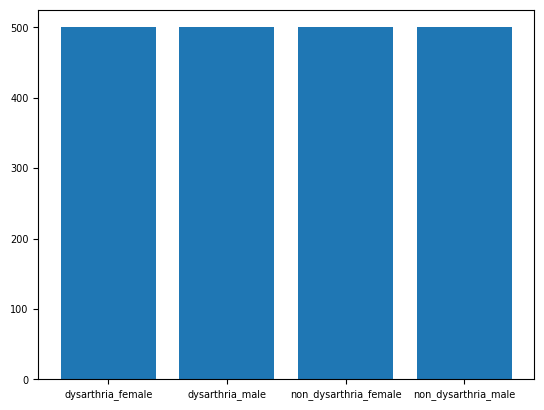

In [ ]:
data_class_list = ['dysarthria_female','dysarthria_male','non_dysarthria_female','non_dysarthria_male']
count_class = [len(os.listdir(DIR_DATASET+data_class)) for data_class in data_class_list]
plt.rcParams.update({'font.size': 7})
plt.bar(data_class_list,count_class)
plt.show()

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/torgo_data/data.csv')
df.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


### **Data visualization**

In [ ]:
prefix_path = '/root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/'

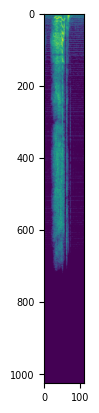

In [ ]:
f, sr = librosa.load('/root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/torgo_data/dysarthria_male/M04_Session2_0280.wav')
st = librosa.stft(f)
spectogram = np.abs(st)
plt.imshow(librosa.amplitude_to_db(spectogram))
Audio('/root/.cache/kagglehub/datasets/iamhungundji/dysarthria-detection/versions/1/torgo_data/dysarthria_male/M04_Session2_0280.wav')

In [ ]:
librosa.amplitude_to_db(spectogram)

array([[  0.36606604,   5.4608126 ,   4.14669   , ...,  12.500784  ,
         13.740299  ,   9.667419  ],
       [ -0.81925046,   3.694786  ,  -5.9919524 , ...,   7.643643  ,
          9.160842  ,   7.490917  ],
       [ -4.926527  ,  -0.05717159,   0.3022976 , ...,  -4.0163107 ,
        -11.229034  ,   0.24048066],
       ...,
       [-33.415012  , -33.415012  , -33.415012  , ..., -33.415012  ,
        -33.415012  , -33.415012  ],
       [-33.415012  , -33.415012  , -33.415012  , ..., -33.415012  ,
        -33.415012  , -33.415012  ],
       [-33.415012  , -33.415012  , -33.415012  , ..., -33.415012  ,
        -33.415012  , -33.415012  ]], dtype=float32)

## **Model Training**